<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import decision_regions

In [ ]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = dataset.iloc[:, [2,3]]
Y = dataset.iloc[:, 4]

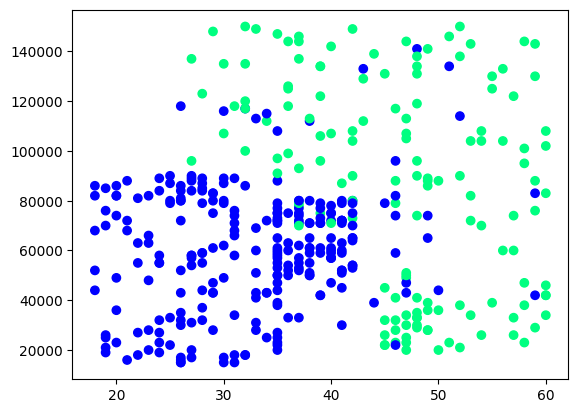

In [ ]:
plt.scatter(dataset['Age'], dataset['EstimatedSalary'], c = Y, cmap = 'winter')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
x_train.shape

(280, 2)

In [ ]:
np.sqrt(280)

np.float64(16.73320053068151)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)

In [ ]:
std = StandardScaler()

In [ ]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8916666666666667

In [ ]:
accuracy = []
for i in range(1, 26):
  new_knn = KNeighborsClassifier(n_neighbors = i)
  new_knn.fit(x_train, y_train)
  new_y_pred = knn.predict(x_test)
  accuracy.append(accuracy_score(y_test, new_y_pred))

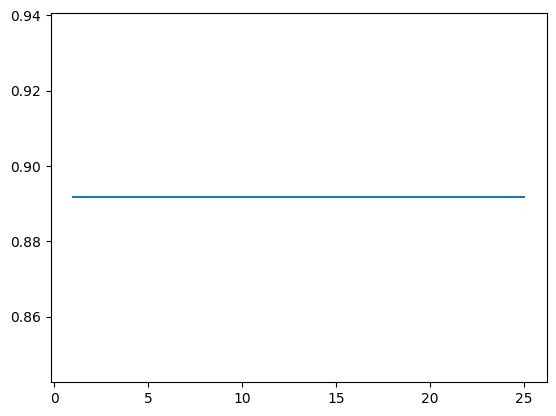

In [ ]:
plt.plot(range(1,26), accuracy)

In [ ]:
X_np = np.array(x_train)
y_np = np.array(y_train)

<Axes: >

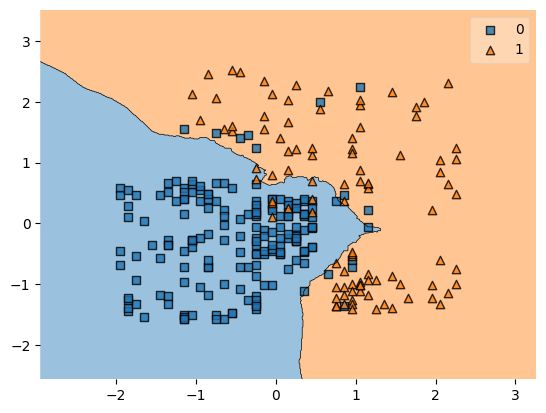

In [ ]:
decision_regions.plot_decision_regions(X_np, y_np, clf=knn)

In [ ]:
user_age = int(input('Enter your age: '))
user_salary = int(input('Enter your salary: '))
user_data = np.array([[user_age, user_salary]])
user_data_scaled = std.transform(user_data)
print(user_data_scaled)
prediction = knn.predict(user_data_scaled)
print(prediction)

Enter your age: 40
Enter your salary: 10000
[[ 0.25509104 -1.71989196]]
[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
